# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [5]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt


In [6]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

implement Linear Regression

note that all the calculations below will be matrix based because of the large number of test points 
which can't be handle one at a time but have to be handled all together

normalize the dataset
assumes we recieve np arrays as input (list of arrays)

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [7]:
# implement Linear Regression

# note that all the calculations below will be matrix based because of the large number of test points 
# which can't be handle one at a time but have to be handled all together

# normalize the dataset
# assumes we recieve np arrays as input (list of arrays)
def normalize(arr):
    mean = []
    std = []
    for i in range(len(arr[0])):
        mean.append(np.mean(arr[:,i]))
        std.append(np.std(arr[:,i]))
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            arr[i][j] = (arr[i][j] - mean[j])/std[j]
    return arr


def func(x, coeff):
    return np.matmul(x, np.transpose(coeff))

# cost calculation fn (expects every array to be np array)
def cost(x, y, coeff):
    fx = func(x, coeff)
    return np.matmul((fx-y), np.transpose(fx-y))/(2*len(y))

# gradient descent fn (also expects np arrays)
def gradientDescent(x, y, coeff, learning_rate, num_epochs):
    costs = []
    x_ = np.hstack((np.ones((x.shape[0],1)), x))
    for i in range(num_epochs):
        fx = func(x_, coeff)
        derivative = np.matmul(np.transpose(x_), fx-y)/len(x_)

        coeff -= learning_rate*derivative
        costs.append(cost(x_, y, coeff))
    return costs

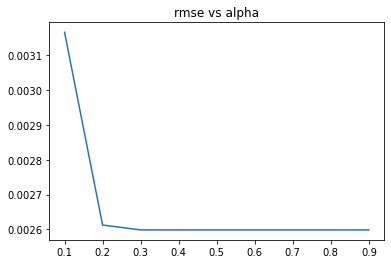

In [16]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
coeff = np.zeros((len(x_train[0]) + 1), dtype=np.float32)
alphas = np.arange(0.1, 1, 0.1, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
x_test_ = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
costs = []

for a in alphas:
    gradientDescent(x_train, y_train, coeff, learning_rate=a, num_epochs=500)
    costs.append(cost(x_test_, y_test, coeff))

plt.plot(alphas, costs)
plt.title("rmse vs alpha")
plt.show()

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

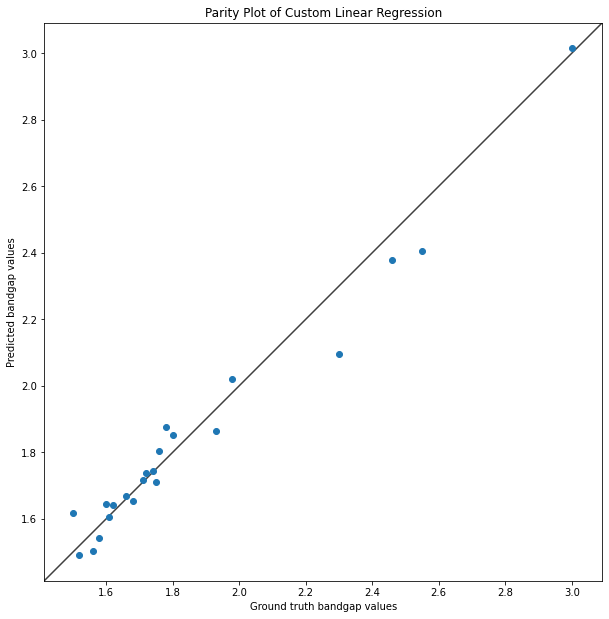

In [17]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

fig, ax = plt.subplots(figsize=(10,20))

x_test = np.array(x_test, dtype=np.float32)
x_test_ = np.hstack((np.ones((x_test.shape[0],1)), x_test))

y_pred = func(x_test_, coeff)
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

### **Ridge Regression**

Ridge regression tends to undermine higher order terms in a model by adding an additional penalty of k*I in the cost function.

rest everything is similar to linear regression.

<!-- Your answer to 1.2.1 -->

## **How linear regression works**

1. Linear regression works by assuming that initially, all the coefficients are 0.
2. Then, we compute the gradient to use in the gradient descent method.
3. Gradient is used to compute the new coefficients until we complete the total number of epochs intended.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

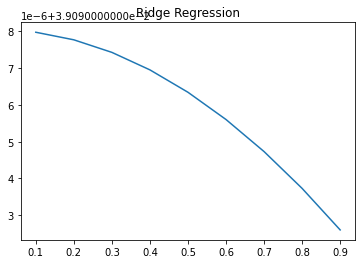

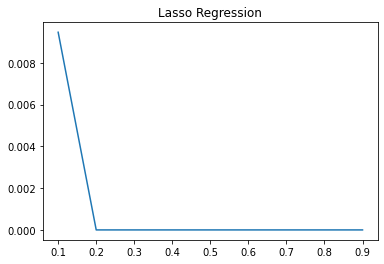

In [18]:
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge, Lasso

def experiment(x, y, yes):
    alphas = np.arange(start=0.1, stop=1.0, step=0.1, dtype=np.float32)
    arr = []
    for a in alphas:
        model = 0
        if yes:
            model = Ridge(alpha=a)
        else:
            model = Lasso(alpha=a)
        model.fit(x, y)
        arr.append(model.score(x, y))
    plt.plot(alphas, arr)
    if yes:
        plt.title('Ridge Regression')
    else:
        plt.title('Lasso Regression')
    plt.show()

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
n_samples, n_features = x_train.shape[0], x_train.shape[1]
rng = np.random.RandomState(5)
y = rng.randn(n_samples)
x = rng.randn(n_samples, n_features)
experiment(x, y, True)
experiment(x, y, False)

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

## **Lasso Regression working**

1. It uses L1 norm for penalty.
2. Basically, it uses sum of absolute difference of coordinates rather than their square as in the more common L2 norm

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

It is clearly visible that Ridge regression is benefitted by the alpha since decreasing alpha decreases RMSE whereas decreasing the alpha only decreases the RMSE in lasso until a certain threshold after which the RMSE remains almost constant.

Alpha decides the speed at which the descent toward optimal coefficients of the model happens. It should ideally be less than 1 since we do not want to fluctuate the coefficients too much.